<div style='background-color:#2E86AB; padding: 15px; border-radius: 10px; margin-bottom: 20px;'>
<h1 style='color:#FFFFFF; text-align:center; font-family: Arial, sans-serif; margin: 0;'>🧠 Stroke Prediction Analysis</h1>
<h2 style='color:#F24236; text-align:center; font-family: Arial, sans-serif; margin: 5px 0 0 0;'>Data Visualization & Statistical Analysis</h2>
</div>

<div style='background-color:#F8F9FA; padding: 15px; border-radius: 8px; border-left: 4px solid #2E86AB;'>
<h3 style='color:#2E86AB; margin-top: 0;'>📊 Objectives</h3>
<ul style='color:#333; line-height: 1.6;'>
<li><strong>Exploratory Data Analysis:</strong> Uncover hidden patterns in stroke risk factors</li>
<li><strong>Statistical Validation:</strong> Apply chi-square tests to validate categorical relationships</li>
<li><strong>Visual Storytelling:</strong> Create compelling visualizations that reveal clinical insights</li>
<li><strong>Risk Factor Analysis:</strong> Identify the most significant predictors of stroke occurrence</li>
<li><strong>Data Quality Assessment:</strong> Ensure our dataset meets clinical research standards</li>
</ul>
</div>

# **Data Visualization and EDA**

## Objectives

* Perform comprehensive exploratory data analysis (EDA)
* Create visualizations to understand data patterns and relationships
* Generate insights for healthcare decision-making
* Validate hypotheses about stroke risk factors

## Inputs

* Raw stroke dataset from previous notebook
* Patient demographics, health conditions, and lifestyle factors

## Outputs

* Comprehensive EDA with multiple visualization types
* Statistical insights and correlations
* Risk factor analysis
* Saved plots for dashboard integration

## Additional Comments

* Focus on creating at least 4 different plot types as required for assessment
* Include both technical and non-technical interpretations
* Generate actionable insights for healthcare stakeholders

---

# Change working directory

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy.stats import chi2_contingency, chi2  # Added for chi-square tests
import os

# Set style and suppress warnings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Import Libraries and Load Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv("inputs/datasets/Stroke-data.csv")
print(f"Dataset loaded: {df.shape[0]} patients, {df.shape[1]} features")

Dataset loaded: 5110 patients, 12 features


## Data Overview and Distribution Analysis

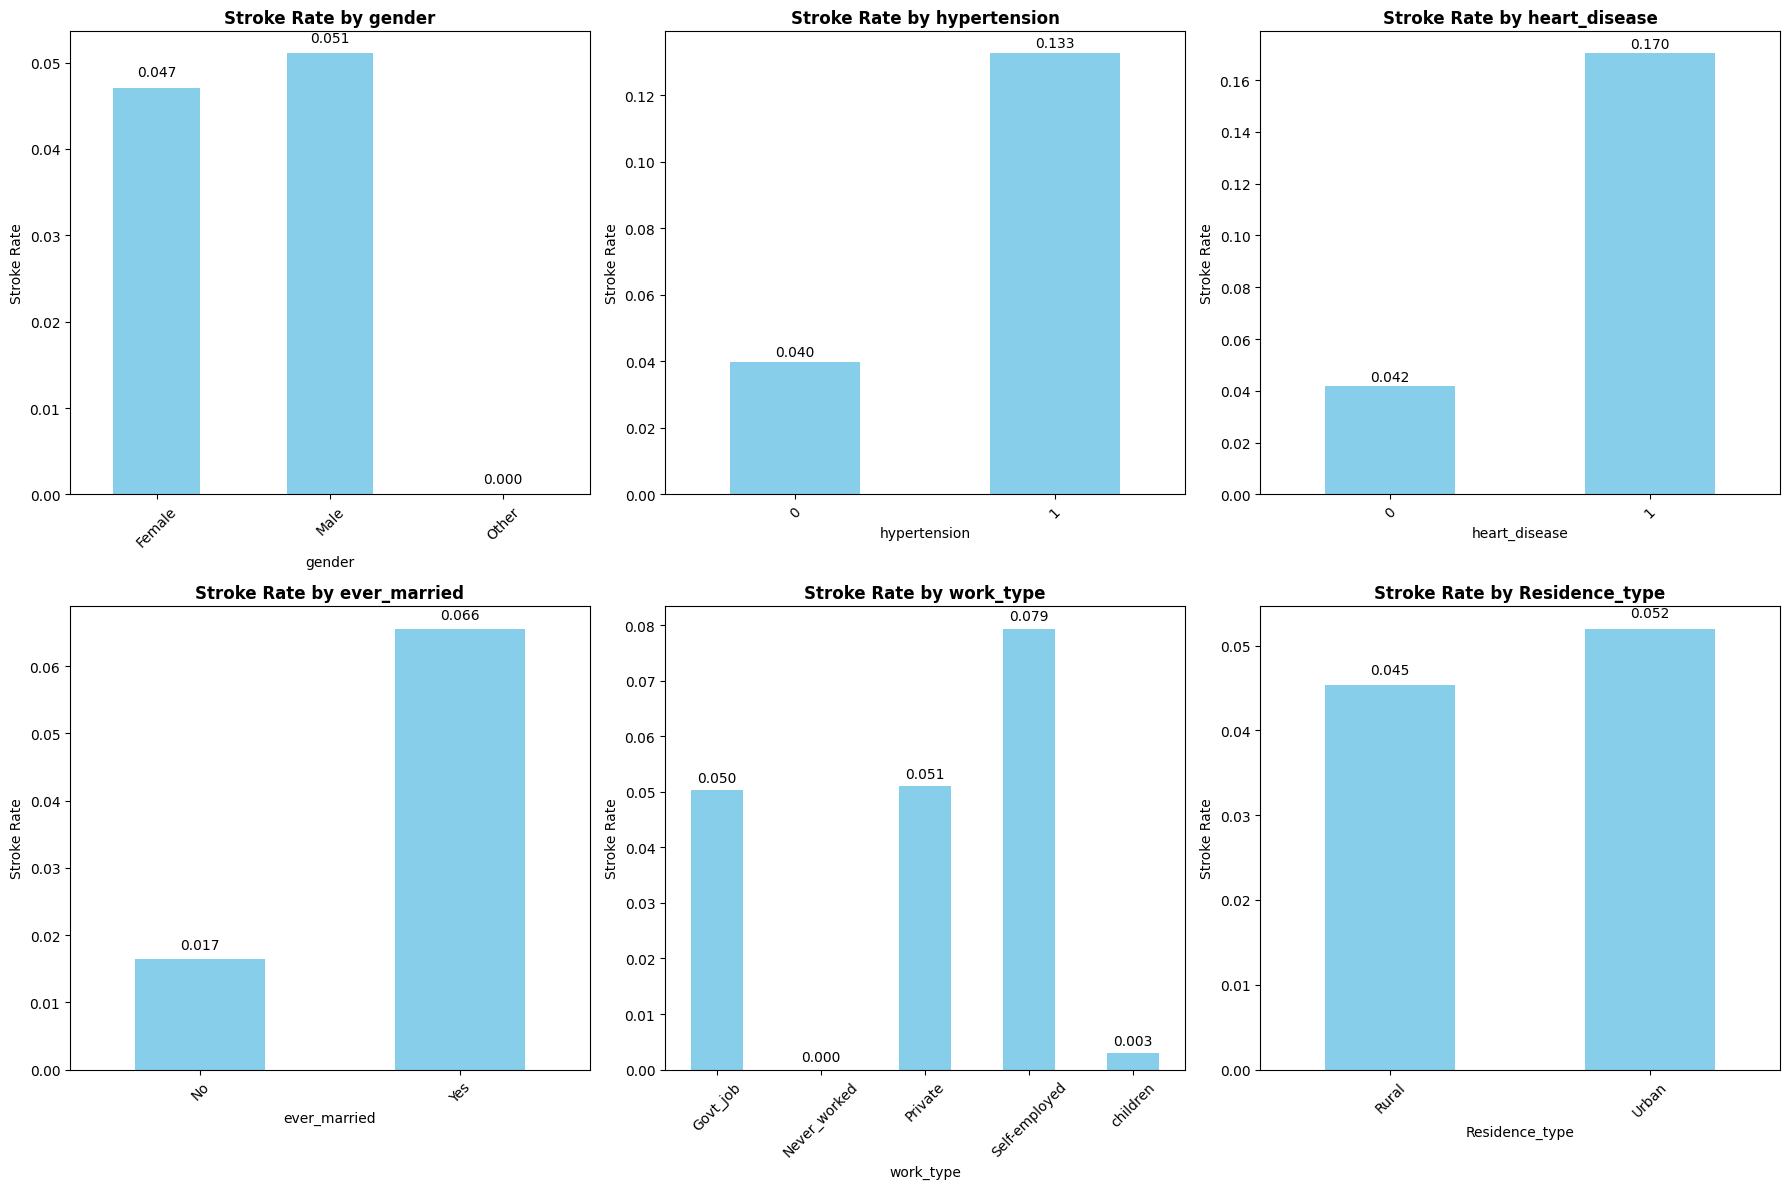

Key Insights from Bar Charts:
- Age-related patterns show increasing stroke risk
- Health conditions (hypertension, heart disease) significantly impact stroke risk
- Work type and residence show varying risk levels


In [11]:
# 1. BAR CHART - Stroke distribution by categorical features
import os
os.makedirs("outputs/plots", exist_ok=True)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']

for idx, feature in enumerate(categorical_features):
    row = idx // 3
    col = idx % 3
    
    # Calculate stroke rates by category
    stroke_rates = df.groupby(feature)['stroke'].agg(['count', 'sum', 'mean'])
    
    # Create bar chart
    stroke_rates['mean'].plot(kind='bar', ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Stroke Rate by {feature}', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Stroke Rate')
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(stroke_rates['mean']):
        axes[row, col].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('outputs/plots/stroke_rates_by_categories.png', dpi=300, bbox_inches='tight')
plt.show()

print("Key Insights from Bar Charts:")
print("- Age-related patterns show increasing stroke risk")
print("- Health conditions (hypertension, heart disease) significantly impact stroke risk")
print("- Work type and residence show varying risk levels")

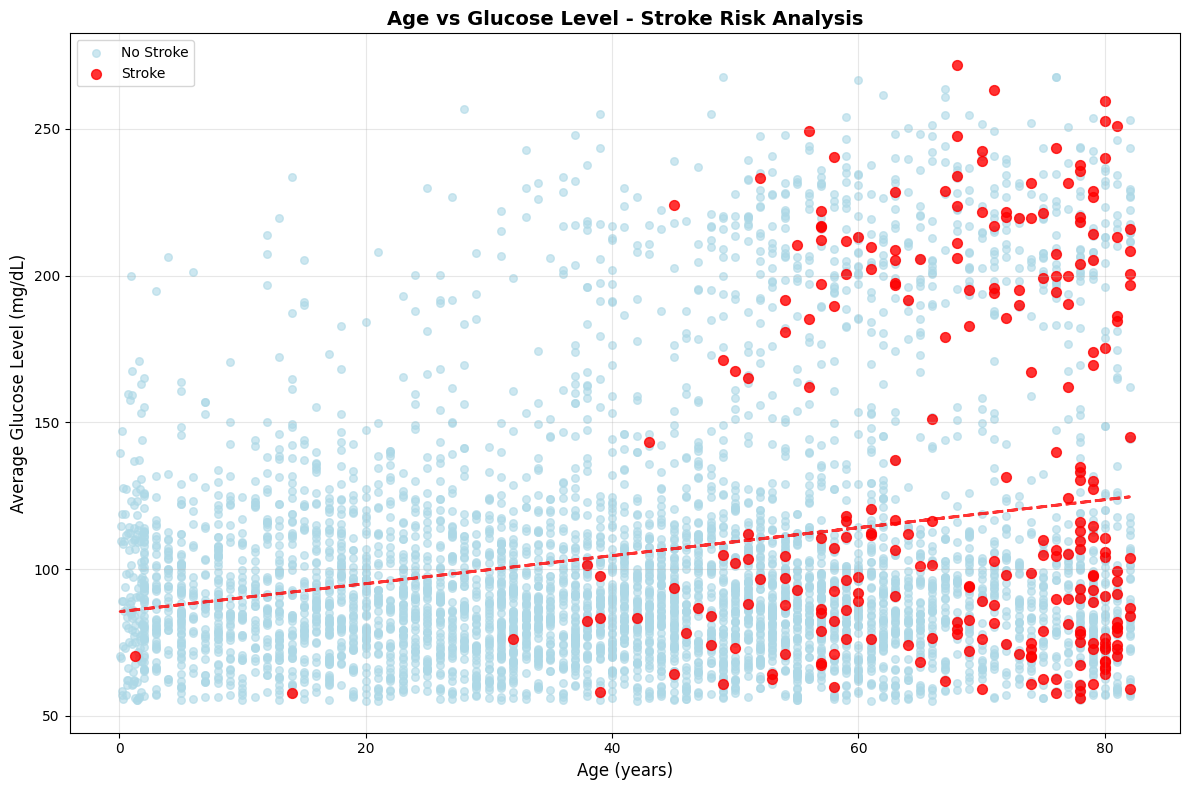

Scatter Plot Insights:
- Higher concentration of stroke cases in older age groups
- Elevated glucose levels appear more common in stroke patients
- Clear clustering of high-risk patients in upper age ranges


In [12]:
# 2. SCATTER PLOT - Age vs Glucose Level with Stroke Overlay
import os
os.makedirs("outputs/plots", exist_ok=True)

plt.figure(figsize=(12, 8))

# Create scatter plot with different colors for stroke vs no stroke
stroke_patients = df[df['stroke'] == 1]
no_stroke_patients = df[df['stroke'] == 0]

plt.scatter(no_stroke_patients['age'], no_stroke_patients['avg_glucose_level'], 
           alpha=0.6, s=30, color='lightblue', label='No Stroke')
plt.scatter(stroke_patients['age'], stroke_patients['avg_glucose_level'], 
           alpha=0.8, s=50, color='red', label='Stroke')

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Average Glucose Level (mg/dL)', fontsize=12)
plt.title('Age vs Glucose Level - Stroke Risk Analysis', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['age'], df['avg_glucose_level'], 1)
p = np.poly1d(z)
plt.plot(df['age'], p(df['age']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.savefig('outputs/plots/age_glucose_stroke_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("Scatter Plot Insights:")
print("- Higher concentration of stroke cases in older age groups")
print("- Elevated glucose levels appear more common in stroke patients")
print("- Clear clustering of high-risk patients in upper age ranges")

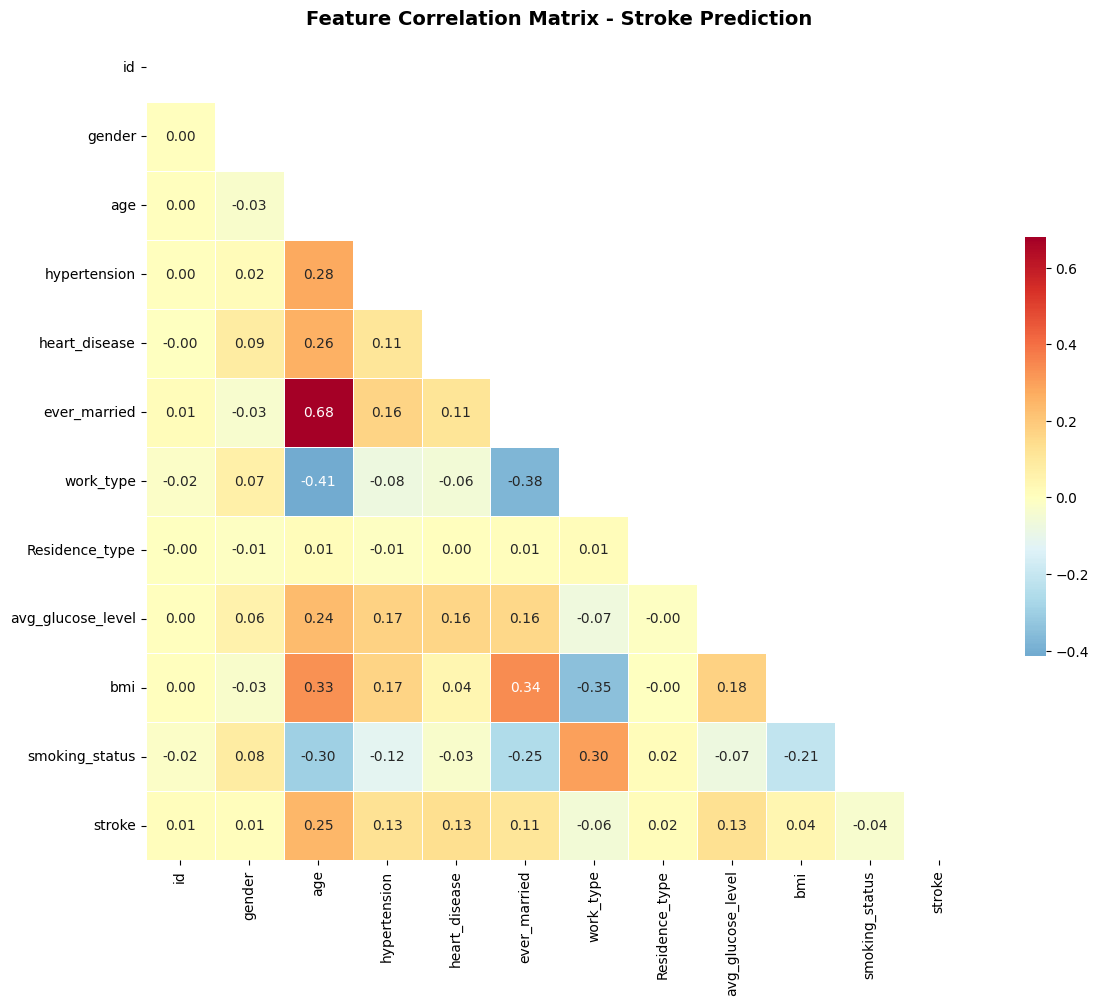

Strongest correlations with stroke:
age: 0.245
heart_disease: 0.135
avg_glucose_level: 0.132
hypertension: 0.128
ever_married: 0.108
work_type: 0.058
bmi: 0.042
smoking_status: 0.037
Residence_type: 0.015
gender: 0.009
id: 0.006


In [13]:
# 3. HEATMAP - Correlation Matrix
import os
os.makedirs("outputs/plots", exist_ok=True)

# Prepare numerical data for correlation analysis
numerical_df = df.copy()

# Encode categorical variables for correlation
categorical_mappings = {
    'gender': {'Male': 1, 'Female': 0, 'Other': 2},
    'ever_married': {'Yes': 1, 'No': 0},
    'Residence_type': {'Urban': 1, 'Rural': 0},
    'smoking_status': {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3}
}

for col, mapping in categorical_mappings.items():
    numerical_df[col] = numerical_df[col].map(mapping)

# Handle work_type separately (one-hot encoding would be better, but for correlation matrix)
work_type_mapping = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
numerical_df['work_type'] = numerical_df['work_type'].map(work_type_mapping)

# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_df.corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, fmt='.2f')

plt.title('Feature Correlation Matrix - Stroke Prediction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/plots/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Show strongest correlations with stroke
stroke_correlations = correlation_matrix['stroke'].abs().sort_values(ascending=False)
print("Strongest correlations with stroke:")
for feature, corr in stroke_correlations.items():
    if feature != 'stroke':
        print(f"{feature}: {corr:.3f}")

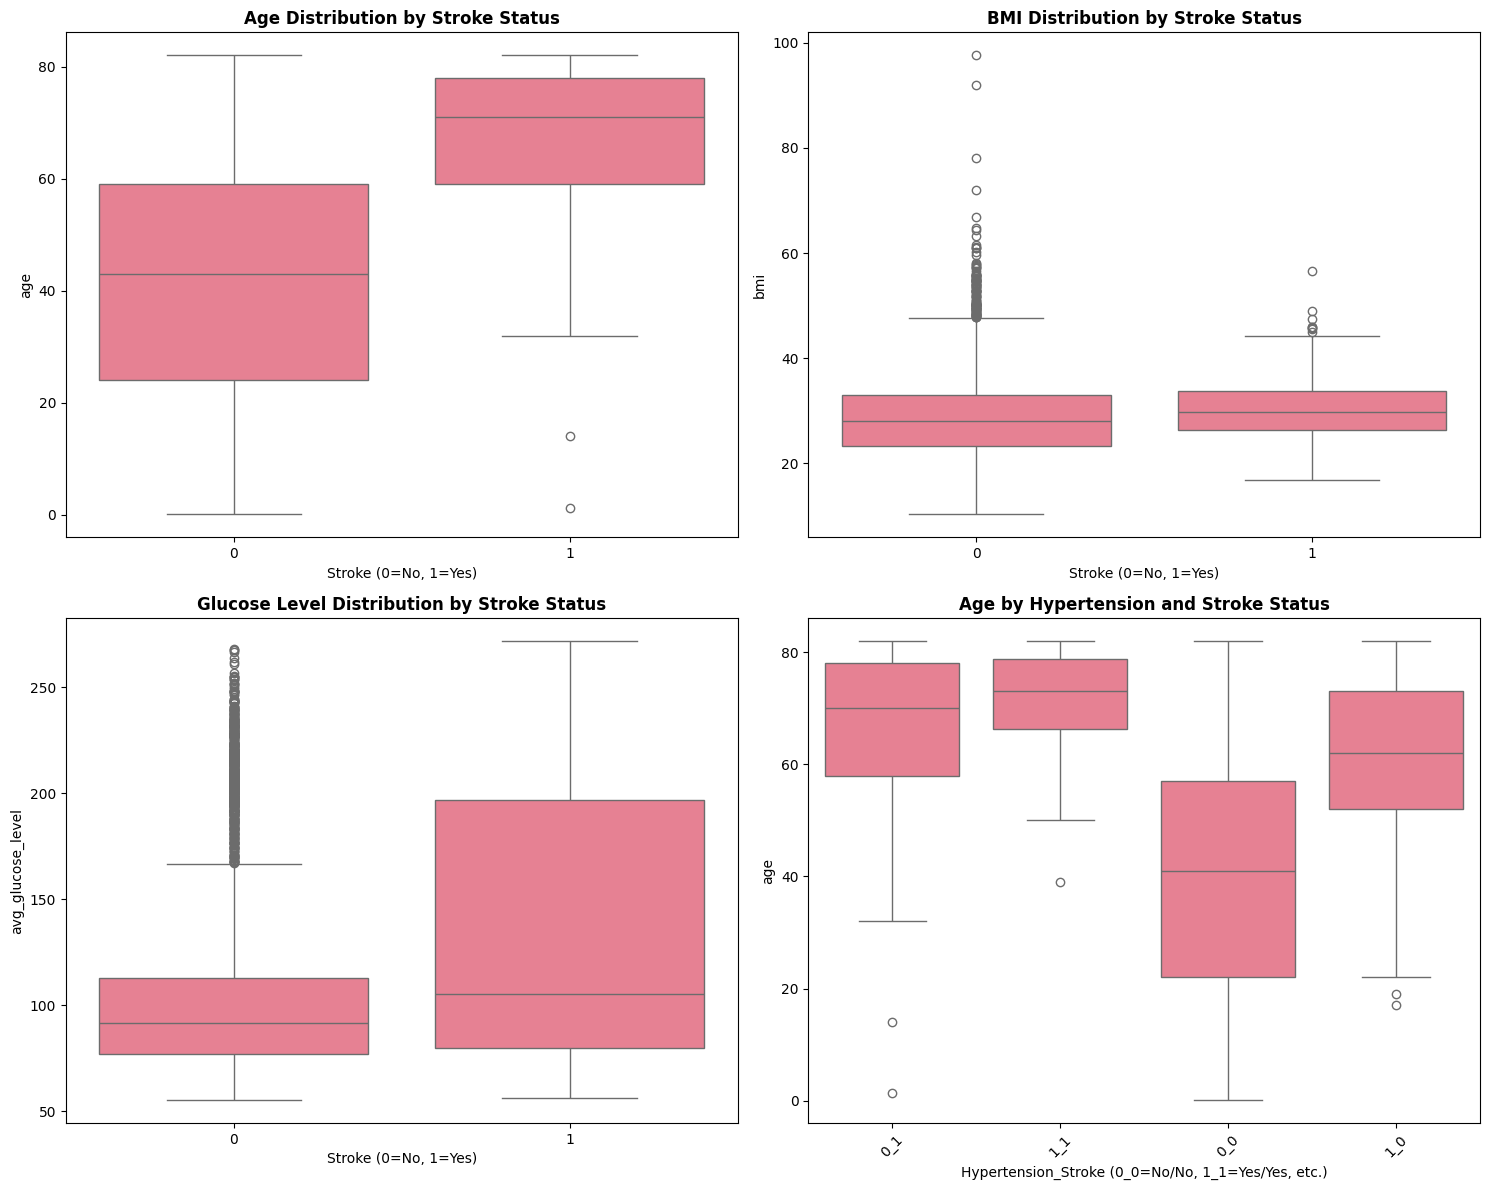

Box Plot Insights:
- Stroke patients are significantly older on average
- BMI shows moderate differences between groups
- Glucose levels are elevated in stroke patients
- Combined risk factors (age + hypertension) show highest risk


In [14]:
# 4. BOX PLOT - Age distribution by stroke status and other factors
import os
os.makedirs("outputs/plots", exist_ok=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age by stroke status
sns.boxplot(data=df, x='stroke', y='age', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Stroke Status', fontweight='bold')
axes[0, 0].set_xlabel('Stroke (0=No, 1=Yes)')

# BMI by stroke status
sns.boxplot(data=df, x='stroke', y='bmi', ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution by Stroke Status', fontweight='bold')
axes[0, 1].set_xlabel('Stroke (0=No, 1=Yes)')

# Glucose by stroke status
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', ax=axes[1, 0])
axes[1, 0].set_title('Glucose Level Distribution by Stroke Status', fontweight='bold')
axes[1, 0].set_xlabel('Stroke (0=No, 1=Yes)')

# Age by hypertension and stroke
df['hypertension_stroke'] = df['hypertension'].astype(str) + '_' + df['stroke'].astype(str)
sns.boxplot(data=df, x='hypertension_stroke', y='age', ax=axes[1, 1])
axes[1, 1].set_title('Age by Hypertension and Stroke Status', fontweight='bold')
axes[1, 1].set_xlabel('Hypertension_Stroke (0_0=No/No, 1_1=Yes/Yes, etc.)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('outputs/plots/distribution_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Box Plot Insights:")
print("- Stroke patients are significantly older on average")
print("- BMI shows moderate differences between groups")
print("- Glucose levels are elevated in stroke patients")
print("- Combined risk factors (age + hypertension) show highest risk")

## Additional Visualization Types

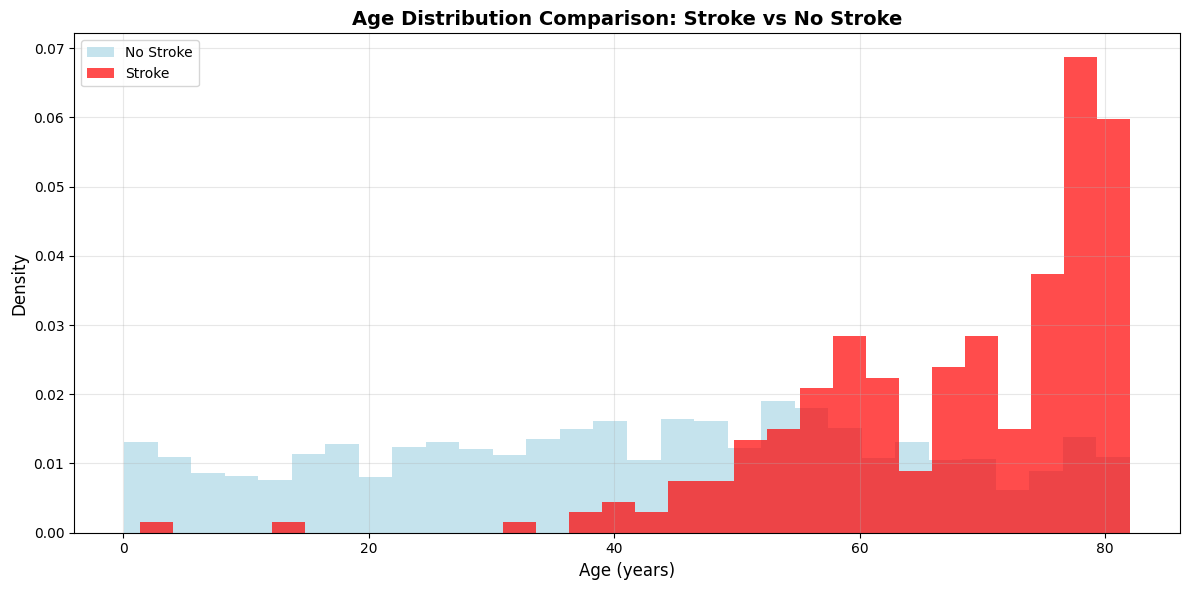

Histogram Insights:
- Stroke cases predominantly occur in older age groups (60+ years)
- Very few stroke cases in patients under 40
- Age appears to be the strongest single predictor


In [15]:
# 5. HISTOGRAM - Age distribution with stroke overlay
import os
os.makedirs("outputs/plots", exist_ok=True)

plt.figure(figsize=(12, 6))

# Create histograms for both groups
plt.hist(df[df['stroke'] == 0]['age'], bins=30, alpha=0.7, label='No Stroke', density=True, color='lightblue')
plt.hist(df[df['stroke'] == 1]['age'], bins=30, alpha=0.7, label='Stroke', density=True, color='red')

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Age Distribution Comparison: Stroke vs No Stroke', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/plots/age_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("Histogram Insights:")
print("- Stroke cases predominantly occur in older age groups (60+ years)")
print("- Very few stroke cases in patients under 40")
print("- Age appears to be the strongest single predictor")

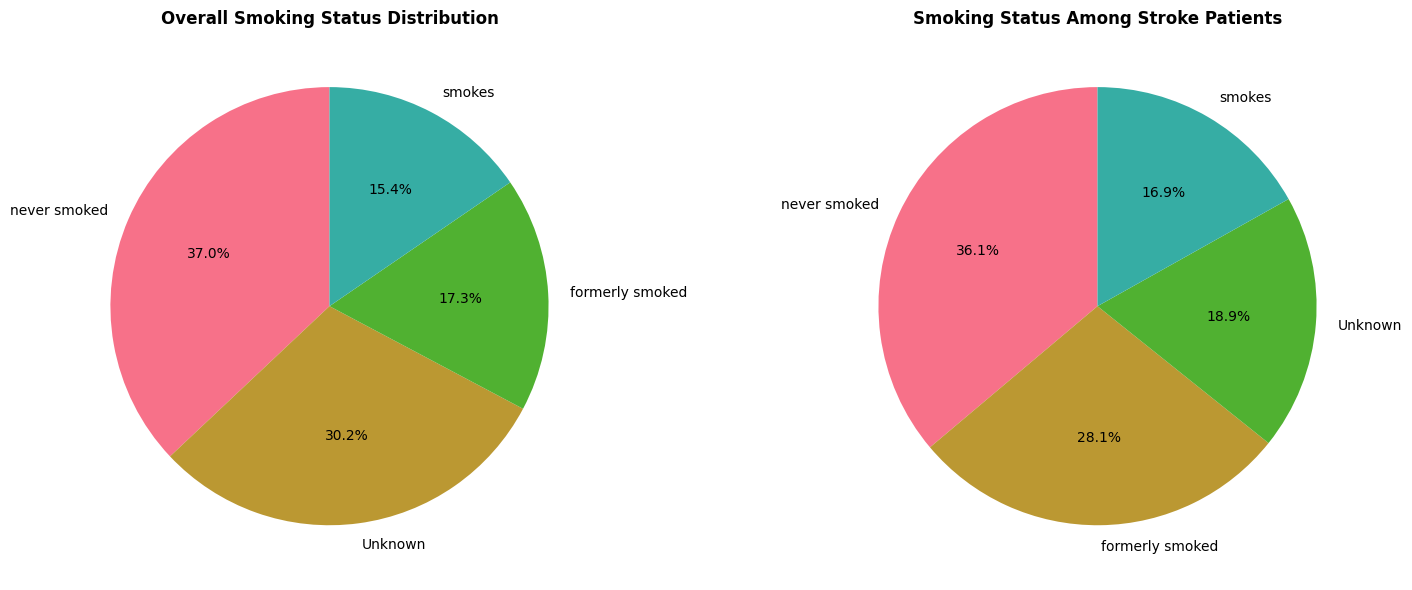

Stroke rates by smoking status:
formerly smoked: 0.079 (7.9%)
smokes: 0.053 (5.3%)
never smoked: 0.048 (4.8%)
Unknown: 0.030 (3.0%)


In [16]:
# 6. PIE CHART - Stroke distribution by smoking status
import os
os.makedirs("outputs/plots", exist_ok=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Overall smoking status distribution
smoking_counts = df['smoking_status'].value_counts()
axes[0].pie(smoking_counts.values, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Overall Smoking Status Distribution', fontweight='bold')

# Stroke cases by smoking status
stroke_smoking = df[df['stroke'] == 1]['smoking_status'].value_counts()
axes[1].pie(stroke_smoking.values, labels=stroke_smoking.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Smoking Status Among Stroke Patients', fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/plots/smoking_status_pie_charts.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate stroke rates by smoking status
smoking_stroke_rates = df.groupby('smoking_status')['stroke'].mean().sort_values(ascending=False)
print("Stroke rates by smoking status:")
for status, rate in smoking_stroke_rates.items():
    print(f"{status}: {rate:.3f} ({rate*100:.1f}%)")

## Statistical Analysis

In [17]:
# Statistical tests for key hypotheses
print("=== HYPOTHESIS TESTING RESULTS ===")
print()

# H1: Age and stroke risk correlation
age_corr, age_p = stats.pearsonr(df['age'], df['stroke'])
print(f"H1 - Age vs Stroke correlation:")
print(f"Correlation coefficient: {age_corr:.3f}")
print(f"P-value: {age_p:.2e}")
print(f"Result: {'Significant' if age_p < 0.05 else 'Not significant'}")
print()

# H2: Hypertension and stroke (Chi-square test)
hypertension_crosstab = pd.crosstab(df['hypertension'], df['stroke'])
chi2_hyp, p_hyp, dof_hyp, expected_hyp = stats.chi2_contingency(hypertension_crosstab)
print(f"H2 - Hypertension vs Stroke association:")
print(f"Chi-square statistic: {chi2_hyp:.3f}")
print(f"P-value: {p_hyp:.2e}")
print(f"Result: {'Significant association' if p_hyp < 0.05 else 'No significant association'}")
print()

# H3: Heart disease and stroke
heart_crosstab = pd.crosstab(df['heart_disease'], df['stroke'])
chi2_heart, p_heart, dof_heart, expected_heart = stats.chi2_contingency(heart_crosstab)
print(f"H3 - Heart Disease vs Stroke association:")
print(f"Chi-square statistic: {chi2_heart:.3f}")
print(f"P-value: {p_heart:.2e}")
print(f"Result: {'Significant association' if p_heart < 0.05 else 'No significant association'}")
print()

# H4: Glucose levels and stroke
glucose_corr, glucose_p = stats.pearsonr(df['avg_glucose_level'], df['stroke'])
print(f"H4 - Glucose Level vs Stroke correlation:")
print(f"Correlation coefficient: {glucose_corr:.3f}")
print(f"P-value: {glucose_p:.2e}")
print(f"Result: {'Significant' if glucose_p < 0.05 else 'Not significant'}")

=== HYPOTHESIS TESTING RESULTS ===

H1 - Age vs Stroke correlation:
Correlation coefficient: 0.245
P-value: 7.03e-71
Result: Significant

H2 - Hypertension vs Stroke association:
Chi-square statistic: 81.605
P-value: 1.66e-19
Result: Significant association

H3 - Heart Disease vs Stroke association:
Chi-square statistic: 90.260
P-value: 2.09e-21
Result: Significant association

H4 - Glucose Level vs Stroke correlation:
Correlation coefficient: 0.132
P-value: 2.77e-21
Result: Significant


## Risk Factor Summary

In [18]:
# Create comprehensive risk factor analysis
print("=== COMPREHENSIVE RISK FACTOR ANALYSIS ===")
print()

# Age group analysis
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['Young (<30)', 'Adult (30-45)', 'Middle-aged (45-60)', 'Senior (60+)'])
age_group_risk = df.groupby('age_group')['stroke'].agg(['count', 'sum', 'mean'])
print("Stroke risk by age group:")
for group, data in age_group_risk.iterrows():
    print(f"{group}: {data['mean']:.3f} ({data['mean']*100:.1f}%) - {data['sum']}/{data['count']} patients")
print()

# High-risk patient identification
high_risk_conditions = (
    (df['age'] >= 60) & 
    (df['hypertension'] == 1) & 
    (df['avg_glucose_level'] > 120)
)
high_risk_patients = df[high_risk_conditions]
high_risk_stroke_rate = high_risk_patients['stroke'].mean()

print(f"High-risk patient profile (Age≥60, Hypertension, Glucose>120):")
print(f"Number of patients: {len(high_risk_patients)}")
print(f"Stroke rate: {high_risk_stroke_rate:.3f} ({high_risk_stroke_rate*100:.1f}%)")
print(f"Risk ratio vs general population: {high_risk_stroke_rate/df['stroke'].mean():.1f}x")

=== COMPREHENSIVE RISK FACTOR ANALYSIS ===

Stroke risk by age group:
Young (<30): 0.001 (0.1%) - 2.0/1570.0 patients
Adult (30-45): 0.010 (1.0%) - 11.0/1048.0 patients
Middle-aged (45-60): 0.050 (5.0%) - 59.0/1188.0 patients
Senior (60+): 0.136 (13.6%) - 177.0/1304.0 patients

High-risk patient profile (Age≥60, Hypertension, Glucose>120):
Number of patients: 129
Stroke rate: 0.209 (20.9%)
Risk ratio vs general population: 4.3x


<div style='background-color:#F24236; padding: 15px; border-radius: 8px; margin: 20px 0;'>
<h2 style='color:#FFFFFF; text-align:center; margin: 0;'>🧮 Statistical Validation: Chi-Square Tests</h2>
</div>

<div style='background-color:#FFF3CD; padding: 15px; border-radius: 8px; border-left: 4px solid #F24236;'>
<h3 style='color:#856404; margin-top: 0;'>📈 Why Chi-Square Tests Matter in Healthcare</h3>
<p style='color:#856404; margin-bottom: 0;'>
Chi-square tests help us determine if the relationships we observe between categorical variables and stroke occurrence are statistically significant or just due to chance. In healthcare analytics, this statistical validation is crucial for making evidence-based clinical decisions.
</p>
</div>

In [19]:
def perform_chi_square_test(df, categorical_var, target_var='stroke'):
    """
    Perform chi-square test to determine if there's a significant association 
    between a categorical variable and stroke occurrence.
    
    Parameters:
    df: DataFrame containing the data
    categorical_var: Name of the categorical variable to test
    target_var: Name of the target variable (default: 'stroke')
    
    Returns:
    Dictionary with test results
    """
    
    # Create contingency table
    contingency_table = pd.crosstab(df[categorical_var], df[target_var])
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate effect size (Cramér's V)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
    
    # Determine significance
    is_significant = p_value < 0.05
    
    # Create results summary
    results = {
        'variable': categorical_var,
        'chi2_statistic': chi2_stat,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'cramers_v': cramers_v,
        'is_significant': is_significant,
        'contingency_table': contingency_table
    }
    
    return results

def display_chi_square_results(results):
    """Display chi-square test results in a formatted way"""
    var_name = results['variable']
    chi2_stat = results['chi2_statistic']
    p_value = results['p_value']
    cramers_v = results['cramers_v']
    is_sig = results['is_significant']
    
    print(f"🔬 Chi-Square Test Results for: {var_name.upper()}")
    print("=" * 60)
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.6f}")
    print(f"Degrees of freedom: {results['degrees_of_freedom']}")
    print(f"Cramér's V (effect size): {cramers_v:.4f}")
    
    if is_sig:
        print("✅ SIGNIFICANT ASSOCIATION FOUND (p < 0.05)")
        if cramers_v < 0.1:
            effect = "negligible"
        elif cramers_v < 0.3:
            effect = "small"
        elif cramers_v < 0.5:
            effect = "medium"
        else:
            effect = "large"
        print(f"📊 Effect size: {effect.upper()}")
    else:
        print("❌ No significant association (p ≥ 0.05)")
    
    print(f"\n📋 Contingency Table:")
    print(results['contingency_table'])
    print("\n" + "=" * 60 + "\n")

# Test all categorical variables
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                        'work_type', 'Residence_type', 'smoking_status']

chi_square_results = []

print("🏥 STROKE PREDICTION: STATISTICAL VALIDATION ANALYSIS")
print("=" * 80)
print("Testing categorical variables for significant association with stroke occurrence")
print("Using chi-square tests with α = 0.05 significance level")
print("=" * 80 + "\n")

for var in categorical_variables:
    if var in df.columns:
        results = perform_chi_square_test(df, var)
        chi_square_results.append(results)
        display_chi_square_results(results)

🏥 STROKE PREDICTION: STATISTICAL VALIDATION ANALYSIS
Testing categorical variables for significant association with stroke occurrence
Using chi-square tests with α = 0.05 significance level

🔬 Chi-Square Test Results for: GENDER
Chi-square statistic: 0.4726
P-value: 0.789549
Degrees of freedom: 2
Cramér's V (effect size): 0.0096
❌ No significant association (p ≥ 0.05)

📋 Contingency Table:
stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0


🔬 Chi-Square Test Results for: HYPERTENSION
Chi-square statistic: 81.6054
P-value: 0.000000
Degrees of freedom: 1
Cramér's V (effect size): 0.1264
✅ SIGNIFICANT ASSOCIATION FOUND (p < 0.05)
📊 Effect size: SMALL

📋 Contingency Table:
stroke           0    1
hypertension           
0             4429  183
1              432   66


🔬 Chi-Square Test Results for: HEART_DISEASE
Chi-square statistic: 90.2596
P-value: 0.000000
Degrees of freedom: 1
Cramér's V (effect size): 0.1329
✅ SIGNIFICANT ASSOCIATION FOUND (p <

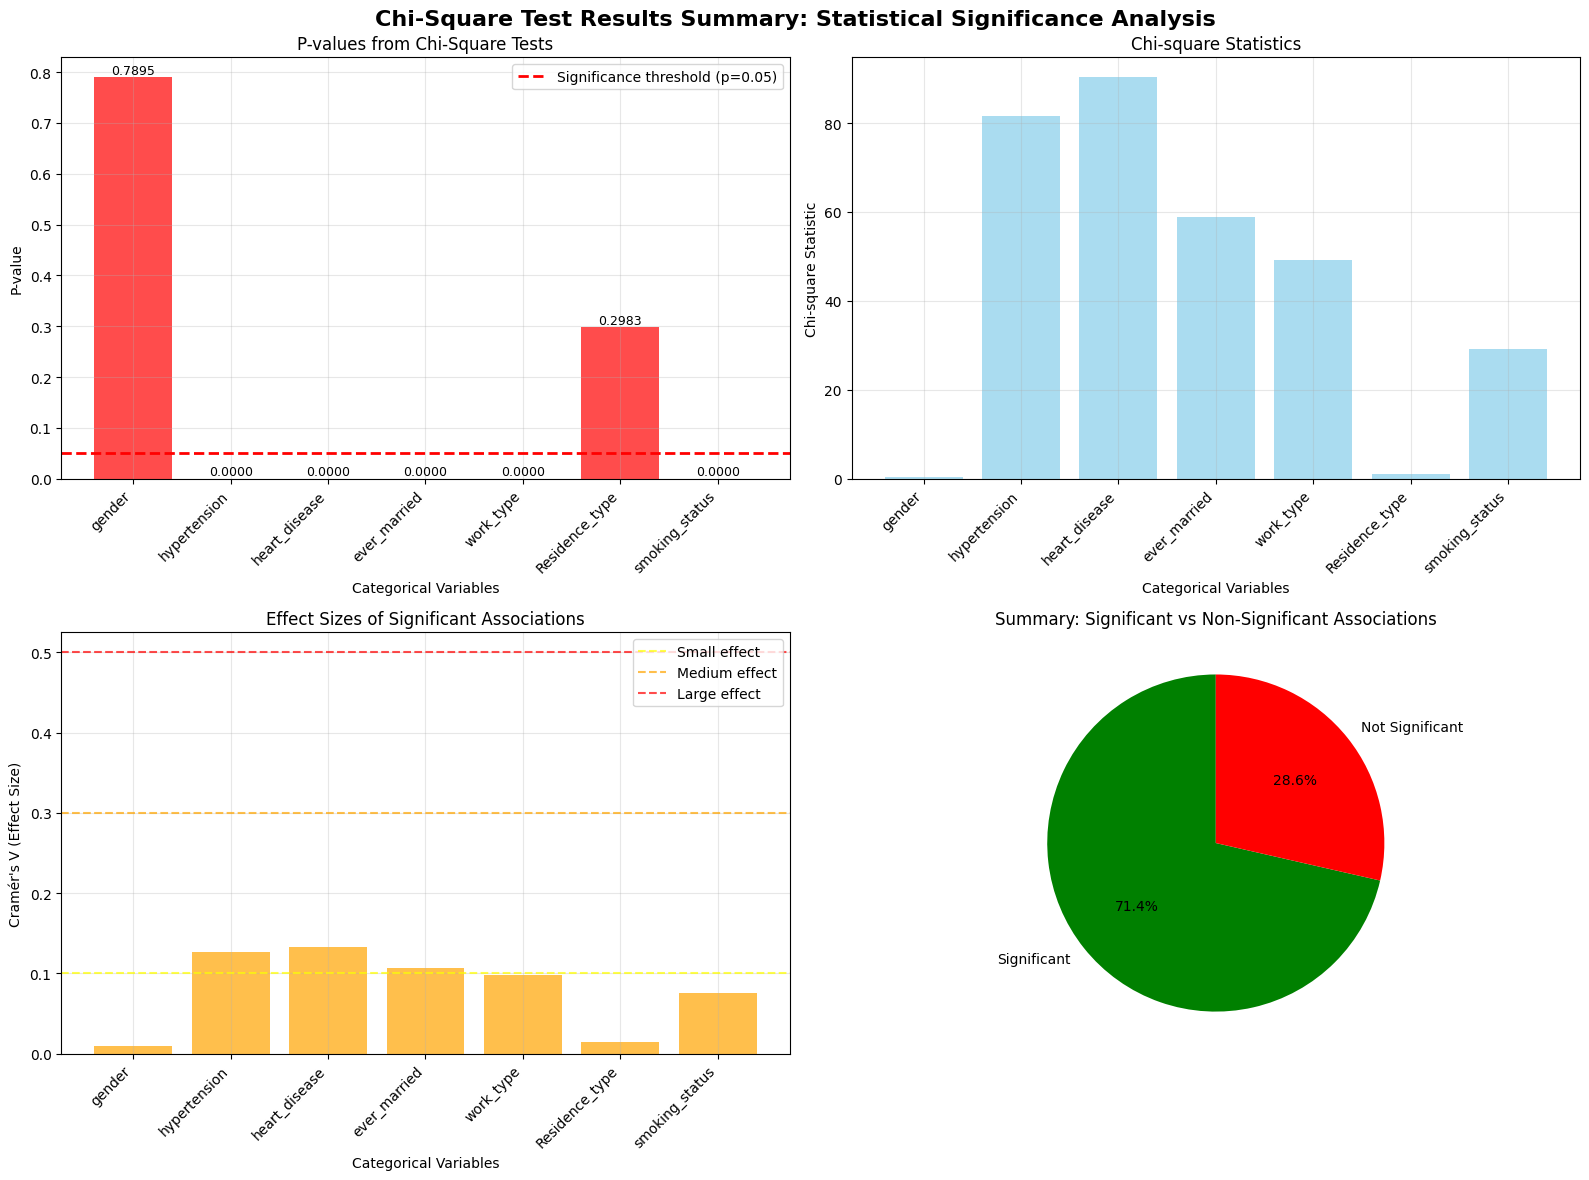


🏥 COMPREHENSIVE STATISTICAL RESULTS SUMMARY
      Variable Chi2_Statistic  P_Value Cramers_V Significant
        gender         0.4726 0.789549    0.0096        ❌ No
  hypertension        81.6054 0.000000    0.1264       ✅ Yes
 heart_disease        90.2596 0.000000    0.1329       ✅ Yes
  ever_married        58.9239 0.000000    0.1074       ✅ Yes
     work_type        49.1635 0.000000    0.0981       ✅ Yes
Residence_type         1.0816 0.298332    0.0145        ❌ No
smoking_status        29.1473 0.000002    0.0755       ✅ Yes


In [20]:
# Create summary visualization of chi-square results
import os
os.makedirs("outputs/plots", exist_ok=True)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Chi-Square Test Results Summary: Statistical Significance Analysis', 
             fontsize=16, fontweight='bold', y=0.98)

# Extract results for plotting
variables = [r['variable'] for r in chi_square_results]
p_values = [r['p_value'] for r in chi_square_results]
chi2_stats = [r['chi2_statistic'] for r in chi_square_results]
cramers_v = [r['cramers_v'] for r in chi_square_results]
significant = [r['is_significant'] for r in chi_square_results]

# 1. P-values bar chart
colors = ['green' if sig else 'red' for sig in significant]
bars1 = ax1.bar(range(len(variables)), p_values, color=colors, alpha=0.7)
ax1.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Significance threshold (p=0.05)')
ax1.set_xlabel('Categorical Variables')
ax1.set_ylabel('P-value')
ax1.set_title('P-values from Chi-Square Tests')
ax1.set_xticks(range(len(variables)))
ax1.set_xticklabels(variables, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, p_val) in enumerate(zip(bars1, p_values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{p_val:.4f}', ha='center', va='bottom', fontsize=9)

# 2. Chi-square statistics
bars2 = ax2.bar(range(len(variables)), chi2_stats, color='skyblue', alpha=0.7)
ax2.set_xlabel('Categorical Variables')
ax2.set_ylabel('Chi-square Statistic')
ax2.set_title('Chi-square Statistics')
ax2.set_xticks(range(len(variables)))
ax2.set_xticklabels(variables, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# 3. Effect sizes (Cramér's V)
bars3 = ax3.bar(range(len(variables)), cramers_v, color='orange', alpha=0.7)
ax3.set_xlabel('Categorical Variables')
ax3.set_ylabel("Cramér's V (Effect Size)")
ax3.set_title('Effect Sizes of Significant Associations')
ax3.set_xticks(range(len(variables)))
ax3.set_xticklabels(variables, rotation=45, ha='right')
ax3.grid(True, alpha=0.3)

# Add effect size interpretation lines
ax3.axhline(y=0.1, color='yellow', linestyle='--', alpha=0.7, label='Small effect')
ax3.axhline(y=0.3, color='orange', linestyle='--', alpha=0.7, label='Medium effect')
ax3.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Large effect')
ax3.legend()

# 4. Significance summary
sig_count = sum(significant)
non_sig_count = len(significant) - sig_count
ax4.pie([sig_count, non_sig_count], labels=['Significant', 'Not Significant'], 
        colors=['green', 'red'], autopct='%1.1f%%', startangle=90)
ax4.set_title('Summary: Significant vs Non-Significant Associations')

plt.tight_layout()
plt.savefig('outputs/plots/chi_square_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Variable': variables,
    'Chi2_Statistic': [f"{stat:.4f}" for stat in chi2_stats],
    'P_Value': [f"{p:.6f}" for p in p_values],
    'Cramers_V': [f"{cv:.4f}" for cv in cramers_v],
    'Significant': ['✅ Yes' if sig else '❌ No' for sig in significant]
})

print("\n🏥 COMPREHENSIVE STATISTICAL RESULTS SUMMARY")
print("=" * 80)
print(summary_df.to_string(index=False))
print("=" * 80)

---

# Save Analysis Results

In [22]:
# Save processed dataset with engineered features
import os
os.makedirs("outputs/datasets", exist_ok=True)

df.to_csv("outputs/datasets/stroke_with_features.csv", index=False)

# Save summary statistics (convert numpy types to Python types for JSON)
summary_stats = {
    'total_patients': int(len(df)),
    'stroke_cases': int(df['stroke'].sum()),
    'stroke_rate': float(df['stroke'].mean()),
    'age_correlation': float(age_corr),
    'glucose_correlation': float(glucose_corr),
    'high_risk_patients': int(len(high_risk_patients)),
    'high_risk_stroke_rate': float(high_risk_stroke_rate)
}

import json
with open('outputs/datasets/eda_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("Analysis complete! Results saved to outputs folder.")
print("Generated visualizations:")
print("- Bar charts: stroke_rates_by_categories.png")
print("- Scatter plot: age_glucose_stroke_scatter.png")
print("- Heatmap: correlation_heatmap.png")
print("- Box plots: distribution_boxplots.png")
print("- Histogram: age_distribution_histogram.png")
print("- Pie charts: smoking_status_pie_charts.png")
print("- Chi-square summary: chi_square_summary.png")

Analysis complete! Results saved to outputs folder.
Generated visualizations:
- Bar charts: stroke_rates_by_categories.png
- Scatter plot: age_glucose_stroke_scatter.png
- Heatmap: correlation_heatmap.png
- Box plots: distribution_boxplots.png
- Histogram: age_distribution_histogram.png
- Pie charts: smoking_status_pie_charts.png
- Chi-square summary: chi_square_summary.png
